In [1]:
%matplotlib inline 
import numpy  as np
import pandas as pd

# Import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt # Pyplot is such a general function that it deserves its own alias
from pandas.plotting import scatter_matrix

features = ["TimeStamp", "Player" ,"Season", "Top %", "Rank", "LP", "Wins", "Losses"]

df = pd.read_csv('tlhulk.csv', names=features)

# Explore and Clean

In [2]:
df.head()

,TimeStamp,Player,Season,Top %,Rank,LP,Wins,Losses
0,2020-11-09 20:17:10.271931,T1: Hulksmash1337,10.0,0.05,Master,74 LP,465W,388L
1,2020-11-09 20:32:09.849985,T1: Hulksmash1337,10.0,0.05,Master,55 LP,465W,389L
2,2020-11-09 21:02:10.704408,T1: Hulksmash1337,10.0,0.05,Master,55 LP,465W,389L
3,2020-11-09 21:32:11.693884,T1: Hulksmash1337,10.0,0.05,Master,36 LP,465W,390L
4,2020-11-09 22:02:14.116090,T1: Hulksmash1337,10.0,0.05,Master,18 LP,465W,391L


### Strip String Data from Int data

In [3]:
df['LP'] = df['LP'].map(lambda x: x.strip(" LP"))
df['Wins'] = df['Wins'].map(lambda x: x.strip("W"))
df['Losses'] = df['Losses'].map(lambda x: x.strip("L"))

### Change Data types

In [4]:
df['Wins'] = df['Wins'].apply(pd.to_numeric)
df['Losses'] = df['Losses'].apply(pd.to_numeric)
df['LP'] = df['LP'].apply(pd.to_numeric)
#ordinal/categoricaldf['Season']

# Feature Engineer

In [5]:
df['Total Games'] = df['Wins'] + df['Losses']

### Function to Create new feature (Enumerating Rank) => Total LP

In [6]:
divisions = { "1": 300,
          "2": 200,
          "3": 100,
          "4": 0   
}

tiers = { "Iron": 0,
          "Bronze": 400,
          "Silver": 800,
          "Gold": 1200,
          "Platinum": 1600,
          "Diamond": 2000,
          "Master": 2400
}

In [13]:
def totalLP():
    rind = 0
    for rank in df['Rank']:
        a= rank.split()[0]
        if rank == "Master":
            b = "4" #worth 0
        else:
            b= rank.split()[1]
        for tier in tiers:
            for division in divisions:
                if a == tier and b == division:
                    df.loc[rind,'Total LP'] = (tiers.get(a) + divisions.get(b)) + df.loc[rind,'LP']
                    rind += 1                             
totalLP()

In [14]:
df.head()

,TimeStamp,Player,Season,Top %,Rank,LP,Wins,Losses,Total Games,Total LP
0,2020-11-09 20:17:10.271931,T1: Hulksmash1337,10.0,0.05,Master,74,465,388,853,2474.0
1,2020-11-09 20:32:09.849985,T1: Hulksmash1337,10.0,0.05,Master,55,465,389,854,2455.0
2,2020-11-09 21:02:10.704408,T1: Hulksmash1337,10.0,0.05,Master,55,465,389,854,2455.0
3,2020-11-09 21:32:11.693884,T1: Hulksmash1337,10.0,0.05,Master,36,465,390,855,2436.0
4,2020-11-09 22:02:14.116090,T1: Hulksmash1337,10.0,0.05,Master,18,465,391,856,2418.0


In [15]:
#pd.plotting.scatter_matrix(df, alpha = 0.8, figsize=(15,15))

# Split accounts

In [16]:
top = df.loc[df['Player']== "T1: Hulksmash1337"]
jungle = df.loc[df['Player']== "T1: S8 IS SO FUN"]

Text(0.5, 1.0, 'Tylers account % in NA over games played')

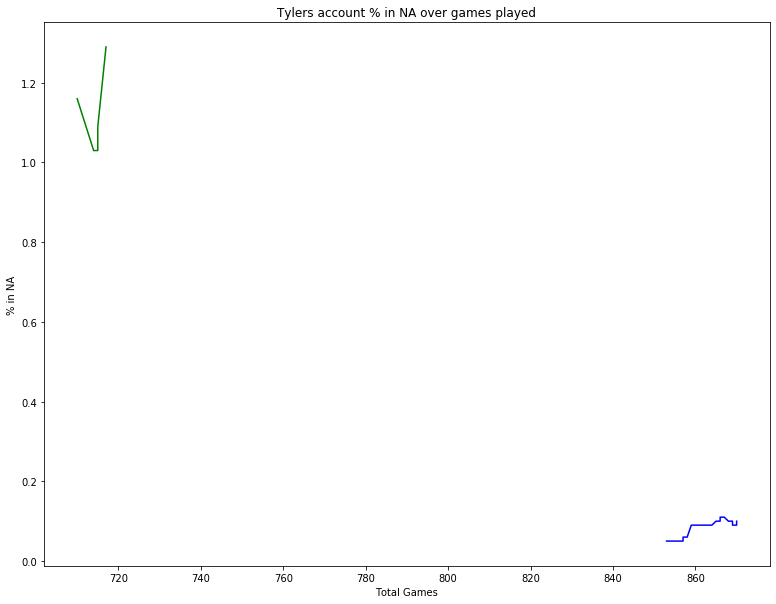

In [17]:
plt.figure(figsize=(13,10))
plt.plot(top['Total Games'], top['Top %'], color="blue", label="Top")
plt.plot(jungle['Total Games'], jungle['Top %'],color="green" , label="JG")
plt.xlabel("Total Games")
plt.ylabel("% in NA")
plt.title("Tylers account % in NA over games played")  

Text(0.5, 1.0, 'Tylers account Games and Total LP')

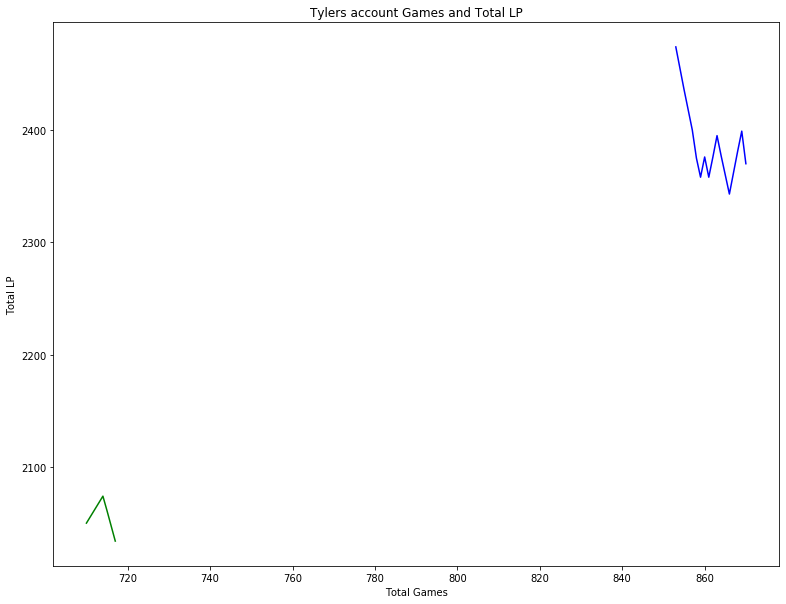

In [18]:
plt.figure(figsize=(13,10))
plt.plot(top['Total Games'], top['Total LP'], color="blue", label="Top")
plt.plot(jungle['Total Games'], jungle['Total LP'],color="green" , label="JG")
plt.xlabel("Total Games")
plt.ylabel("Total LP")
plt.title("Tylers account Games and Total LP")  